<a href="https://colab.research.google.com/github/socrisogo/bc_social_media_productivity/blob/main/Proyecto_TTECH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Presentación

Este proyecto se enfoca en el análisis exploratorio, descriptivo y de negocio sobre el mercado laboral global en el área de inteligencia artificial y aprendizaje automático, utilizando un conjunto de datos que contiene ofertas de empleo en diferentes países. A través de un enfoque técnico dividido en varias fases (ingestión, limpieza, análisis descriptivo y análisis de negocio), se busca extraer conocimientos clave sobre salarios, demanda de habilidades, adopción del trabajo remoto y patrones geográficos.

# Justificación

Este proyecto se estructura en cuatro fases técnicas clave: ingestión de datos, preparación y limpieza, análisis descriptivo y análisis de negocio. A partir de un conjunto de datos  que simula más de 15.000 ofertas de empleo relacionadas con inteligencia artificial en más de 50 países, se trabajará en la carga eficiente de los datos, validación de su estructura y conversión de tipos. Posteriormente, se realizará la limpieza de valores nulos o inconsistentes, la normalización de variables como monedas, niveles de experiencia y categorías de trabajo, así como la transformación de fechas y estandarización de ubicaciones. En la etapa de análisis descriptivo se aplicarán técnicas estadísticas y visualizaciones para explorar distribuciones salariales, demanda de habilidades, modalidades de empleo y tendencias temporales. Finalmente, en el análisis de negocio se evaluarán variaciones salariales según tamaño de empresa, tipo de contrato, país y relación remota, además del impacto de las habilidades requeridas y la educación mínima. Este enfoque técnico permitirá generar conclusiones relevantes para modelos predictivos, inteligencia empresarial, planificación profesional y análisis de brechas laborales en el mercado global de IA para 2025.

# Preguntas de negocio

1. Compensación y salarios

1 ¿Qué países ofrecen los salarios promedio más altos en el área de IA? 

2 ¿Cómo varía el salario promedio según el nivel de experiencia (EN(Junior), MI(Intermediate), SE(Senior), EX(Director))?

3 ¿Cuál es la relación entre el tamaño de la empresa (S(Small), M(Medium), L(Large)) y el salario ofrecido?

4 ¿Qué categorías de trabajo (científico de datos, ingeniero de ML, etc.) tienen mayores salarios?

5 ¿Existe diferencia salarial significativa entre tipos de empleo (FT(Full time), PT(Part time), CT(Contract), FL(Freelance))?

6 ¿Cuál es la relación entre el porcentaje de trabajo remoto y el salario promedio?

7 ¿Qué industrias pagan más para roles de IA?

2. Análisis geográfico

8 ¿Qué países concentran la mayor cantidad de ofertas laborales en IA?

9 ¿Cómo se distribuyen los tipos de contratos por país?

10 ¿Cuál es la relación entre ubicación de la empresa y residencia del empleado?

11 ¿Dónde es más frecuente el trabajo remoto o híbrido?

12 ¿Qué países tienen mayor demanda de determinadas habilidades?


3. Tendencias y evolución del mercado

13 ¿Cómo ha evolucionado la oferta de empleo en IA a lo largo del tiempo?

14 ¿Que habilidades son mas demandadas?

15 ¿Se han incrementado las ofertas con modalidad remota?

16 ¿Cuáles son los picos de publicación de vacantes en el año?

17 ¿Se observan patrones en la duración entre la fecha de publicación y la fecha de aplicación?

# Ingestión de datos

In [ ]:
# Abrir el archivo e importar la data
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from kmodes.kprototypes import KPrototypes
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd


df=pd.read_csv("diversified_job_postings_version0.csv")

# Preparación y limpieza

In [62]:
#Mostramos un resumen de la información del DataFrame
# Esto incluye el número de entradas, el tipo de datos de cada columna y la cantidad de valores no nulos     
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

In [63]:
#Revisamos si hay valores nulos en el DataFrame
print(df.isnull().sum())

job_id                    0
job_title                 0
salary_usd                0
salary_currency           0
experience_level          0
employment_type           0
company_location          0
company_size              0
employee_residence        0
remote_ratio              0
required_skills           0
education_required        0
years_experience          0
industry                  0
posting_date              0
application_deadline      0
job_description_length    0
benefits_score            0
company_name              0
dtype: int64


In [64]:
#Revisamos los valores únicos de las columnas relevantes
# Esto nos ayuda a entender la diversidad de datos en cada columna y detectar posibles inconsistencias  
print(df[['job_title',
'salary_currency',
'experience_level',
'employment_type',
'company_location',
'company_size',
'employee_residence',
'remote_ratio',
'education_required',
'industry']].nunique())

job_title             20
salary_currency        3
experience_level       4
employment_type        4
company_location      20
company_size           3
employee_residence    20
remote_ratio           3
education_required     4
industry              15
dtype: int64


In [65]:
#Limpieza y transformación de datos

# 1. Eliminar columnas innecesarias
df= df.drop('job_description_length', axis=1, errors='ignore')

# 2. Convertir los valor4es de fecha a tipo datetime
df['posting_date'] = pd.to_datetime(df['posting_date'], errors='coerce')
df['application_deadline'] = pd.to_datetime(df['application_deadline'], errors='coerce')

# 3. Convertir la columna de salario a numérico
df['salary_usd'] = pd.to_numeric(df['salary_usd'], errors='coerce')

# 4. Calculamos la duración del proceso de aplicación en dias
df['application_duration_days'] = (df['application_deadline'] - df['posting_date']).dt.days

# 5. Separar habilidades como lista
df['required_skills'] = df['required_skills'].fillna('').apply(
    lambda x: [s.strip() for s in x.split(',') if s.strip()]
)

# 6. Renombrar niveles de experiencia
experience_map = {
    "SE": "Expert",
    "MI": "Intermediate",
    "EN": "Junior",
    "EX": "Director"
}
df['experience_level'] = df['experience_level'].astype(str).str.strip().replace(experience_map).astype('category')

# 7. Renombrar tipo de empleo
employment_map = {
    "PT": "Part-time",
    "FT": "Full-time",
    "CT": "Contract",
    "FL": "Freelance"
}
df['employment_type'] = df['employment_type'].astype(str).str.strip().replace(employment_map).astype('category')

# 8. Renombrar tamaño de empresa
size_map = {
    "S": "Small",
    "M": "Medium",
    "L": "Large"
}
df['company_size'] = df['company_size'].astype(str).str.strip().replace(size_map).astype('category')

# 9. Clasificación para remote_ratio
remote_map = {
    0: 'No remote',
    50: 'Hybrid',
    100: 'Fully remote'
}
df['remote_ratio'] = df['remote_ratio'].replace(remote_map).astype('category')

# 10. Categóricos iniciales
cat_cols = ['job_title', 'experience_level', 'employment_type', 'company_location',
            'company_size', 'employee_residence', 'remote_ratio', 'education_required', 'industry']
df[cat_cols] = df[cat_cols].astype('category')


print(df.head())

    job_id              job_title  salary_usd salary_currency  \
0  AI00001  AI Research Scientist       90376             USD   
1  AI00002   AI Software Engineer       61895             USD   
2  AI00003          AI Specialist      152626             USD   
3  AI00004           NLP Engineer       80215             USD   
4  AI00005          AI Consultant       54624             EUR   

  experience_level employment_type company_location company_size  \
0           Expert        Contract            China       Medium   
1           Junior        Contract           Canada       Medium   
2     Intermediate       Freelance      Switzerland        Large   
3           Expert       Freelance            India       Medium   
4           Junior       Part-time           France        Small   

  employee_residence  remote_ratio  \
0              China        Hybrid   
1            Ireland  Fully remote   
2        South Korea     No remote   
3              India        Hybrid   
4         

# Analítica descriptiva

In [66]:
#Se realiza la estadistica descriptiva de los datos
print(df.describe())

          salary_usd  years_experience                posting_date  \
count   15000.000000      15000.000000                       15000   
mean   115348.965133          6.253200  2024-08-29 08:48:51.840000   
min     32519.000000          0.000000         2024-01-01 00:00:00   
25%     70179.750000          2.000000         2024-04-29 00:00:00   
50%     99705.000000          5.000000         2024-08-28 00:00:00   
75%    146408.500000         10.000000         2024-12-29 00:00:00   
max    399095.000000         19.000000         2025-04-30 00:00:00   
std     60260.940438          5.545768                         NaN   

             application_deadline  benefits_score  application_duration_days  
count                       15000    15000.000000               15000.000000  
mean   2024-10-11 21:55:23.520000        7.504273                  43.546200  
min           2024-01-16 00:00:00        5.000000                  14.000000  
25%           2024-06-13 00:00:00        6.200000    

salary_usd:
  Media: 115348.97
  Mediana: 99705.00
  Moda: 51000.00

years_experience:
  Media: 6.25
  Mediana: 5.00
  Moda: 0.00

benefits_score:
  Media: 7.50
  Mediana: 7.50
  Moda: 9.90



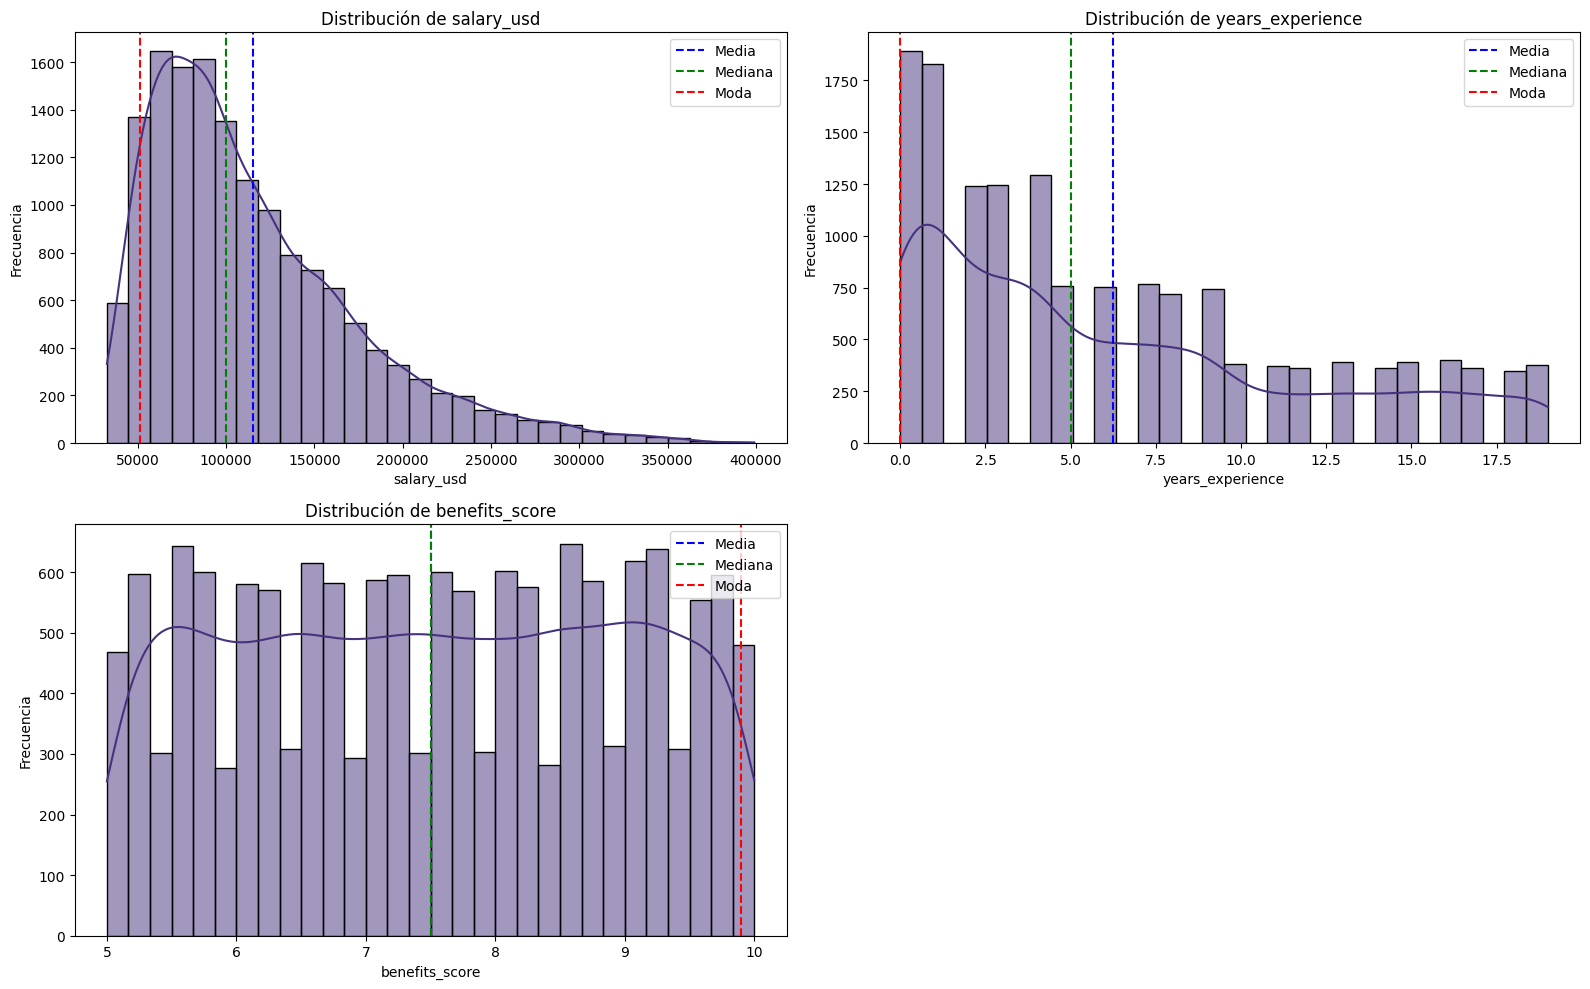

In [ ]:

# Selección de columnas
numeric_cols = ['salary_usd', 'years_experience', 'benefits_score']

# Eliminar nulos
df_clean = df[numeric_cols].dropna()

# Calcular estadísticas
desc_stats = {}
for col in numeric_cols:
    desc_stats[col] = {
        'media': df_clean[col].mean(),
        'mediana': df_clean[col].median(),
        'moda': df_clean[col].mode()[0]
    }

# Imprimir estadísticas
for col, stats_dict in desc_stats.items():
    print(f"{col}:")
    print(f"  Media: {stats_dict['media']:.2f}")
    print(f"  Mediana: {stats_dict['mediana']:.2f}")
    print(f"  Moda: {stats_dict['moda']:.2f}\n")

# Visualizar distribuciones
sns.set_palette("viridis")
plt.figure(figsize=(16, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_clean[col], kde=True, bins=30)
    plt.axvline(desc_stats[col]['media'], color='blue', linestyle='--', label='Media')
    plt.axvline(desc_stats[col]['mediana'], color='green', linestyle='--', label='Mediana')
    plt.axvline(desc_stats[col]['moda'], color='red', linestyle='--', label='Moda')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.legend()
plt.tight_layout()
plt.show()


In [ ]:


# 1. Boxplot: Salario por nivel de educación
fig_box_edu = px.box(
    df,
    x='education_required',
    y='salary_usd',
    color='education_required',
    title='Distribución del salario por nivel de educación',
    labels={'education_required': 'Nivel de educación', 'salary_usd': 'Salario (USD)'},
    color_discrete_sequence=px.colors.sequential.Viridis
)
fig_box_edu.update_layout(xaxis_tickangle=-45)
fig_box_edu.show()

# 2. Boxplot: Salario por job title (top 10)
top_jobs = df['job_title'].value_counts().head(10).index
df_top_jobs = df[df['job_title'].isin(top_jobs)]
fig_box_job = px.box(
    df_top_jobs,
    x='job_title',
    y='salary_usd',
    color='job_title',
    title='Distribución del salario por cargo (Top 10)',
    labels={'job_title': 'Cargo', 'salary_usd': 'Salario (USD)'},
    color_discrete_sequence=px.colors.sequential.Plasma
)
fig_box_job.update_layout(xaxis_tickangle=-45)
fig_box_job.show()

# 3. Boxplot: Salario por años de experiencia
fig_box_exp = px.box(
    df,
    x='years_experience',
    y='salary_usd',
    color='years_experience',
    title='Distribución del salario por años de experiencia',
    labels={'years_experience': 'Años de experiencia', 'salary_usd': 'Salario (USD)'},
    color_discrete_sequence=px.colors.sequential.Viridis
)
fig_box_exp.update_layout(xaxis_tickangle=-45)
fig_box_exp.show()

# 4. Boxplot: Salario por tamaño de empresa
fig_box_size = px.box(
    df,
    x='company_size',
    y='salary_usd',
    color='company_size',
    title='Distribución del salario por tamaño de empresa',
    labels={'company_size': 'Tamaño de empresa', 'salary_usd': 'Salario (USD)'},
    color_discrete_sequence=px.colors.sequential.Plasma
)
fig_box_size.update_layout(xaxis_tickangle=-45)
fig_box_size.show()

# 5. Boxplot: Salario por industria (top 10)
top_industries = df['industry'].value_counts().head(10).index
df_top_industries = df[df['industry'].isin(top_industries)]
fig_box_industry = px.box(
    df_top_industries,
    x='industry',
    y='salary_usd',
    color='industry',
    title='Distribución del salario por industria (Top 10)',
    labels={'industry': 'Industria', 'salary_usd': 'Salario (USD)'},
    color_discrete_sequence=px.colors.sequential.Viridis
)
fig_box_industry.update_layout(xaxis_tickangle=-45)
fig_box_industry.show()

# 6. Boxplot: Salario por nivel de experiencia
fig_box_exp_level = px.box(
    df,
    x='experience_level',
    y='salary_usd',
    color='experience_level',
    title='Distribución del salario por nivel de experiencia',
    labels={'experience_level': 'Nivel de experiencia', 'salary_usd': 'Salario (USD)'},
    color_discrete_sequence=px.colors.sequential.Plasma
)
fig_box_exp_level.update_layout(xaxis_tickangle=-45)
fig_box_exp_level.show()



In [68]:
# 1. ¿Qué ha pasado? (Resumen general)
total_ofertas = len(df)
salario_promedio = df['salary_usd'].mean()
salario_mediana = df['salary_usd'].median()
salario_min = df['salary_usd'].min()
salario_max = df['salary_usd'].max()
q1 = df['salary_usd'].quantile(0.25)
q3 = df['salary_usd'].quantile(0.75)

print(f"Total de ofertas analizadas: {total_ofertas}")
print(f"El salario promedio es ${salario_promedio:,.0f} USD.")
print(f"El salario mediano es ${salario_mediana:,.0f} USD.")
print(f"El salario más bajo registrado es ${salario_min:,.0f} USD.")
print(f"El salario más alto registrado es ${salario_max:,.0f} USD.")
print(f"El 25% de los empleados gana menos de ${q1:,.0f} USD.")
print(f"El 25% superior gana más de ${q3:,.0f} USD.")

# 2. ¿Cómo se distribuyen los datos?
rango_concentrado = (q1, q3)
print(f"Los sueldos están más concentrados entre ${rango_concentrado[0]:,.0f} y ${rango_concentrado[1]:,.0f} USD.")

# 3. ¿Cuáles son los valores más comunes, extremos o atípicos?
moda_salario = df['salary_usd'].mode()[0]
print(f"El salario más común es ${moda_salario:,.0f} USD.")

# 4. Sector que mejor paga
sector_mejor_paga = df.groupby('industry')['salary_usd'].mean().sort_values(ascending=False).index[0]
salario_sector_top = df.groupby('industry')['salary_usd'].mean().max()
print(f"El sector que mejor paga es \"{sector_mejor_paga}\" con un salario promedio de ${salario_sector_top:,.0f} USD.")

# 5. Identificación de valores extremos (outliers)
outliers = df[df['salary_usd'] > salario_max * 0.95]
print(f"Cantidad de salarios extremadamente altos (top 5%): {len(outliers)}")

Total de ofertas analizadas: 15000
El salario promedio es $115,349 USD.
El salario mediano es $99,705 USD.
El salario más bajo registrado es $32,519 USD.
El salario más alto registrado es $399,095 USD.
El 25% de los empleados gana menos de $70,180 USD.
El 25% superior gana más de $146,408 USD.
Los sueldos están más concentrados entre $70,180 y $146,408 USD.
El salario más común es $51,000 USD.
El sector que mejor paga es "Consulting" con un salario promedio de $117,602 USD.
Cantidad de salarios extremadamente altos (top 5%): 8


C:\Users\jonat\AppData\Local\Temp\ipykernel_25532\3999091285.py:27: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\jonat\AppData\Local\Temp\ipykernel_25532\3999091285.py:28: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [ ]:


# 1. Boxplot: Salario por nivel de educación
fig_box_edu = px.box(
    df,
    x='education_required',
    y='salary_usd',
    color='education_required',
    title='Distribución del salario por nivel de educación',
    labels={'education_required': 'Nivel de educación', 'salary_usd': 'Salario (USD)'},
    color_discrete_sequence=px.colors.sequential.Viridis
)
fig_box_edu.update_layout(xaxis_tickangle=-45)
fig_box_edu.show()

# 2. Boxplot: Salario por job title (top 10)
top_jobs = df['job_title'].value_counts().head(10).index
df_top_jobs = df[df['job_title'].isin(top_jobs)]
fig_box_job = px.box(
    df_top_jobs,
    x='job_title',
    y='salary_usd',
    color='job_title',
    title='Distribución del salario por cargo (Top 10)',
    labels={'job_title': 'Cargo', 'salary_usd': 'Salario (USD)'},
    color_discrete_sequence=px.colors.sequential.Plasma
)
fig_box_job.update_layout(xaxis_tickangle=-45)
fig_box_job.show()

# 3. Boxplot: Salario por años de experiencia
fig_box_exp = px.box(
    df,
    x='years_experience',
    y='salary_usd',
    color='years_experience',
    title='Distribución del salario por años de experiencia',
    labels={'years_experience': 'Años de experiencia', 'salary_usd': 'Salario (USD)'},
    color_discrete_sequence=px.colors.sequential.Viridis
)
fig_box_exp.update_layout(xaxis_tickangle=-45)
fig_box_exp.show()

# 4. Boxplot: Salario por tamaño de empresa
fig_box_size = px.box(
    df,
    x='company_size',
    y='salary_usd',
    color='company_size',
    title='Distribución del salario por tamaño de empresa',
    labels={'company_size': 'Tamaño de empresa', 'salary_usd': 'Salario (USD)'},
    color_discrete_sequence=px.colors.sequential.Plasma
)
fig_box_size.update_layout(xaxis_tickangle=-45)
fig_box_size.show()

# 5. Boxplot: Salario por industria (top 10)
top_industries = df['industry'].value_counts().head(10).index
df_top_industries = df[df['industry'].isin(top_industries)]
fig_box_industry = px.box(
    df_top_industries,
    x='industry',
    y='salary_usd',
    color='industry',
    title='Distribución del salario por industria (Top 10)',
    labels={'industry': 'Industria', 'salary_usd': 'Salario (USD)'},
    color_discrete_sequence=px.colors.sequential.Viridis
)
fig_box_industry.update_layout(xaxis_tickangle=-45)
fig_box_industry.show()

# 6. Boxplot: Salario por nivel de experiencia
fig_box_exp_level = px.box(
    df,
    x='experience_level',
    y='salary_usd',
    color='experience_level',
    title='Distribución del salario por nivel de experiencia',
    labels={'experience_level': 'Nivel de experiencia', 'salary_usd': 'Salario (USD)'},
    color_discrete_sequence=px.colors.sequential.Plasma
)
fig_box_exp_level.update_layout(xaxis_tickangle=-45)
fig_box_exp_level.show()



# Análisis de negocio

Pregunta 1: Países con mejores salarios

In [69]:
# Agrupamos por ubicacion de compañia y calculamos el salario promedio
# Luego ordenamos de mayor a menor y seleccionamos los 15 primeros
top_salaries_by_country = (
    df.groupby('company_location')['salary_usd']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

fig = px.bar(
    top_salaries_by_country,
    x='company_location',
    y='salary_usd',
    title='Top 10 Ubicación de compañias con salarios promedio más altos de empleos IA',
    labels={'company_location': 'Compañias x País', 'salary_usd': 'Salario Promedio (USD)'},
    text='salary_usd',
    color='company_location',
    color_discrete_sequence=px.colors.sequential.Viridis
)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(xaxis_tickangle=-45, showlegend=False)

fig.show()

C:\Users\jonat\AppData\Local\Temp\ipykernel_25532\21642077.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Pregunta 2: Salario promedio según nivel de experiencia 

In [70]:
# Agrupar salario promedio por nivel de experiencia
salary_by_experience = (
    df.groupby('experience_level')['salary_usd']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# Crear gráfico de barras con Plotly
fig = px.bar(
    salary_by_experience,
    x='experience_level',
    y='salary_usd',
    title='Salario promedio según nivel de experiencia',
    labels={'experience_level': 'Nivel de experiencia','salary_usd': 'Salario Promedio (USD)'},
    text='salary_usd',
    color='experience_level',
    color_discrete_sequence=px.colors.sequential.Plasma
)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(xaxis={'categoryorder': 'total descending'}, xaxis_tickangle=-45, showlegend=False)

# Mostrar gráfico
fig.show()

C:\Users\jonat\AppData\Local\Temp\ipykernel_25532\3314658632.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Pregunta 3: Salario promedio por tamaño de empresa


In [71]:

# Agrupar salario promedio por tamaño de empresa
salary_by_company_size = (
    df.groupby('company_size')['salary_usd']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# Crear gráfico
fig_size = px.bar(
    salary_by_company_size,
    x='company_size',
    y='salary_usd',
    title='Salario promedio según tamaño de empresa',
    labels={'company_size': 'Tamaño de la empresa','salary_usd': 'Salario Promedio (USD)'},
    text='salary_usd',
    color='company_size',
    color_discrete_sequence=px.colors.sequential.Plasma
)
fig_size.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig_size.update_layout(xaxis={'categoryorder': 'total descending'},xaxis_tickangle=-45, showlegend=False)

# Mostrar gráfico
fig_size.show()


C:\Users\jonat\AppData\Local\Temp\ipykernel_25532\2700398743.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Pregunta 4: Top 15 categorías de trabajo con mayores salarios

In [72]:
# Agrupar por título del trabajo y calcular salario promedio
top_roles_by_salary = (
    df.groupby('job_title')['salary_usd']
    .mean()
    .sort_values(ascending=False)
    .head(15)
    .reset_index()
)

# Gráfico con tonos cálidos
fig_roles = px.bar(
    top_roles_by_salary,
    x='salary_usd',
    y='job_title',
    orientation='h',
    title='Top 15 Trabajos con mayores salarios en IA',
    labels={'job_title': 'Categoría de trabajo', 'salary_usd': 'Salario Promedio (USD)'},
    text='salary_usd',
    color='salary_usd',  # Usamos el valor de salario como referencia de color
    color_continuous_scale=px.colors.sequential.Viridis
)
fig_roles.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig_roles.update_layout(yaxis={'categoryorder': 'total ascending'}, coloraxis_showscale=True)

fig_roles.show()

C:\Users\jonat\AppData\Local\Temp\ipykernel_25532\3614549739.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Pregunta 5: Salario promedio según tipo de empleo

In [73]:
# Agrupar por tipo de empleo y calcular salario promedio
salary_by_employment = (
    df.groupby('employment_type')['salary_usd']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# Gráfico de barras con escala Viridis
fig_employment = px.bar(
    salary_by_employment,
    x='employment_type',
    y='salary_usd',
    title='Salario promedio según tipo de empleo',
    labels={'employment_type': 'Tipo de empleo', 'salary_usd': 'Salario Promedio (USD)'},
    text='salary_usd',
    color='employment_type',
    color_discrete_sequence=px.colors.sequential.Plasma
)
fig_employment.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig_employment.update_layout(xaxis={'categoryorder': 'total descending'}, xaxis_tickangle=-45, showlegend=False)

fig_employment.show()


C:\Users\jonat\AppData\Local\Temp\ipykernel_25532\3044914780.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Pregunta 6: Salario promedio según porcentaje de trabajo remoto

In [74]:
# Agrupar salario promedio por porcentaje de trabajo remoto (0, 50, 100)
salary_by_remote = (
    df.groupby('remote_ratio')['salary_usd']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# Gráfico de barras
fig_remote = px.bar(
    salary_by_remote,
    x='remote_ratio',
    y='salary_usd',
    title='Salario promedio según porcentaje de trabajo remoto',
    labels={'remote_ratio': 'Porcentaje de trabajo remoto (%)', 'salary_usd': 'Salario Promedio (USD)'},
    text='salary_usd',
    color='remote_ratio',
    color_discrete_sequence=px.colors.sequential.Plasma
)
fig_remote.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig_remote.update_layout(xaxis={'categoryorder': 'category descending'}, xaxis_tickangle=-45, showlegend=False)

fig_remote.show()

C:\Users\jonat\AppData\Local\Temp\ipykernel_25532\1135467220.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Pregunta 7: Top 15 industrias con mayores salarios

In [75]:
# Agrupar por industria y calcular salario promedio (top 15)
salary_by_industry = (
    df.groupby('industry')['salary_usd']
    .mean()
    .sort_values(ascending=False)
    .head(15)
    .reset_index()
)

# Gráfico horizontal
fig_industry = px.bar(
    salary_by_industry,
    x='salary_usd',
    y='industry',
    orientation='h',
    title='Top 15 Sectores de la industria con mayores salarios en IA',
    labels={
        'industry': 'Sectores de la Industria',
        'salary_usd': 'Salario Promedio (USD)'
    },
    text='salary_usd',
    color='salary_usd',
    color_continuous_scale=px.colors.sequential.Viridis
)
fig_industry.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig_industry.update_layout(yaxis={'categoryorder': 'total ascending'},  coloraxis_showscale=True)

fig_industry.show()


C:\Users\jonat\AppData\Local\Temp\ipykernel_25532\1499446091.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Pregunta 8: Top 15 países con mayor cantidad de ofertas laborales 

In [76]:

# Agrupar por país de empresa y contar
offers_by_country = (
    df['company_location']
    .value_counts()
    .head(10)
    .reset_index()
)
offers_by_country.columns = ['company_location', 'Cantidad']  # asignación de nombres a las columnas

# Gráfico
fig_country = px.bar(
    offers_by_country,
    x='company_location',
    y='Cantidad',
    title='Top 10 Ubicación de compañias con mayor cantidad de ofertas laborales en IA',
    labels={'company_location': 'Compañias x País','Cantidad': 'Cantidad de ofertas'},
    text='Cantidad',
    color='company_location',
    color_discrete_sequence=px.colors.sequential.Viridis
)
fig_country.update_traces(texttemplate='%{text}', textposition='outside')
fig_country.update_layout(xaxis={'categoryorder': 'total descending'}, xaxis_tickangle=-45, showlegend=False)

fig_country.show()

Pregunta 9: Distribución de tipos de contrato por país

In [77]:

# Agrupación y conteo
contract_distribution = (
    df.groupby(['company_location', 'employment_type'])
    .size()
    .reset_index(name='Cantidad')
)

# Obtener el top 10 países con más contratos
top_countries = (
    contract_distribution.groupby('company_location')['Cantidad']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# Filtrar solo esos países
contract_distribution_top10 = contract_distribution[contract_distribution['company_location'].isin(top_countries)]

#Seleccion de colores especificos para el gráfico
custom_colors = [px.colors.sequential.Viridis[6], 
                 px.colors.sequential.Viridis[9], 
                 px.colors.sequential.Viridis[3], 
                 px.colors.sequential.Viridis[7]]

# Crear gráfico con orden aplicado
fig_contract = px.bar(
    contract_distribution_top10,
    x='company_location',
    y='Cantidad',
    color='employment_type',
    title='Distribución de tipos de contrato por Ubicación de compañia',
    labels={'company_location': 'Compañias x País','num_offers': 'Cantidad de Ofertas', 'employment_type': 'Tipo de empleo'}, 
    text='Cantidad',
    color_discrete_sequence=custom_colors
)

fig_contract.update_layout(xaxis={'categoryorder': 'total descending'}, xaxis_tickangle=-45, showlegend=True)
fig_contract.show()


C:\Users\jonat\AppData\Local\Temp\ipykernel_25532\352130047.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\jonat\AppData\Local\Temp\ipykernel_25532\352130047.py:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Pregunta 10: Relación entre ubicación de la empresa y residencia del empleado 

In [78]:
# Contar cantidad de empleados por país de residencia
residence_counts = (
    df['employee_residence']
    .value_counts()
    .reset_index()
)
residence_counts.columns = ['employee_residence', 'num_employees']

# Gráfico de barras
fig_residence = px.bar(
    residence_counts,
    x='employee_residence',
    y='num_employees',
    text='num_employees',
    title='Países donde residen los empleados de IA',
    labels={'employee_residence': 'País de residencia del empleado', 'num_employees': 'Cantidad de empleados'},
    color='employee_residence',
    color_discrete_sequence=px.colors.sequential.Viridis
)
fig_residence.update_traces(texttemplate='%{text}', textposition='outside')
fig_residence.update_layout(xaxis={'categoryorder': 'total descending'}, xaxis_tickangle=-45, showlegend=False)

fig_residence.show()

In [79]:
# Contar empresas por país
company_location_counts = (
    df['company_location']
    .value_counts()
    .reset_index()
)
company_location_counts.columns = ['company_location', 'num_companies']

# Gráfico de barras
fig_companies = px.bar(
    company_location_counts,
    x='company_location',
    y='num_companies',
    text='num_companies',
    title='Ubicacion de las compañias con empleos IA',
    labels={
        'company_location': 'Compañias x País',
        'num_companies': 'Cantidad de empresas'
    },
    color='company_location',
    color_discrete_sequence=px.colors.sequential.Viridis
)
fig_companies.update_traces(texttemplate='%{text}', textposition='outside')
fig_companies.update_layout(xaxis={'categoryorder': 'total descending'}, xaxis_tickangle=-45, showlegend=False)

fig_companies.show()

In [80]:
# --- Pregunta 10: Relación entre ubicación de la empresa y residencia del empleado ---

# Agrupar por país de empresa y país de residencia del empleado
location_relation = (
    df.groupby(['company_location', 'employee_residence'])
    .size()
    .reset_index(name='num_matches')
)

# Filtrar las 20 relaciones más frecuentes
top_location_matches = location_relation.sort_values('num_matches', ascending=False)

# Gráfico de burbujas
fig_location_relation = px.scatter(
    top_location_matches,
    x='company_location',
    y='employee_residence',
    title='Relación entre ubicación de la empresa y residencia del empleado',
    labels={
        'company_location': 'Ubicación de la empresa',
        'employee_residence': 'Residencia del empleado',
        'num_matches': 'Coincidencias'
    },
    size='num_matches',
    color='num_matches',
    color_continuous_scale=px.colors.sequential.Viridis
)

fig_location_relation.update_layout(xaxis_tickangle=-45)
fig_location_relation.show()


C:\Users\jonat\AppData\Local\Temp\ipykernel_25532\2941318082.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Pregunta 11: Distribución del trabajo remoto o híbrido por país

In [81]:
# Agrupar por país y modalidad de trabajo
remote_distribution = (
    df.groupby(['company_location', 'remote_ratio'])
    .size()
    .reset_index(name='Cantidad')
)

#Seleccion de colores especificos para el gráfico
custom_colors = [px.colors.sequential.Viridis[6], 
                 px.colors.sequential.Viridis[9], 
                 px.colors.sequential.Viridis[3], 
                 px.colors.sequential.Viridis[7]]

# Gráfico de barras apiladas
fig_remote_distribution = px.bar(
    remote_distribution,
    x='company_location',
    y='Cantidad',
    color='remote_ratio',
    text='Cantidad',
    title='Frecuencia del trabajo remoto o híbrido por Ubicacion de la compañia',
    labels={
        'company_location': 'Compañias x País',
        'remote_ratio': 'Modalidad de trabajo',
        'num_offers': 'Cantidad de ofertas'
    },
    color_discrete_sequence=custom_colors
)

fig_remote_distribution.update_layout(xaxis={'categoryorder': 'total descending'}, xaxis_tickangle=-45, showlegend=True)
fig_remote_distribution.show()


C:\Users\jonat\AppData\Local\Temp\ipykernel_25532\3586640310.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Pregunta 12-1: Top habilidades más demandadas por país

In [83]:

# Asegurarse de tener habilidades separadas
skills_by_country = df.explode('required_skills')

# Contar menciones globales por habilidad
top_skills_global = (
    skills_by_country['required_skills']
    .value_counts()
    .reset_index()
)
top_skills_global.columns = ['required_skills', 'count']

# Gráfico de barras horizontales
fig_top_skills = px.bar(
    top_skills_global,
    x='count',
    y='required_skills',
    orientation='h',
    title='Top habilidades más demandadas en IA (global)',
    labels={
        'count': 'Cantidad de menciones',
        'required_skills': 'Habilidad'
    },
    text='count',
    color='count',
    color_continuous_scale=px.colors.sequential.Viridis
)

fig_top_skills.update_traces(textposition='outside')
fig_top_skills.update_layout(yaxis={'categoryorder': 'total ascending'})
fig_top_skills.show()

Pregunta 12-2: Top 10 habilidades más demandadas en IA 

In [84]:
# Expandir habilidades
skills_by_country = df.explode('required_skills')

# Obtener las 10 habilidades más frecuentes
top_skills_pie = (
    skills_by_country['required_skills']
    .value_counts()
    .head(10)
    .reset_index()
)
top_skills_pie.columns = ['required_skills', 'count']

# Gráfico de torta
fig_pie_skills = px.pie(
    top_skills_pie,
    names='required_skills',
    values='count',
    title='Top 10 habilidades más demandadas en IA (global)',
    color_discrete_sequence=px.colors.sequential.Viridis
)

fig_pie_skills.update_traces(textposition='inside', textinfo='percent+label')
fig_pie_skills.show()

Pregunta 12-3: Top habilidades más demandadas por país 

In [86]:

# Expandir la lista de habilidades a una por fila
skills_by_country = df.explode('required_skills')

# Agrupar por país y habilidad
skill_demand = (
    skills_by_country.groupby(['company_location', 'required_skills'])
    .size()
    .reset_index(name='count')
)

# Seleccionar las combinaciones más frecuentes
top_skills_by_country = skill_demand.sort_values('count', ascending=False)

# Gráfico de burbujas
fig_skills = px.scatter(
    top_skills_by_country,
    x='company_location',
    y='required_skills',
    size='count',
    color='count',
    color_continuous_scale=px.colors.sequential.Viridis,
    title='Top habilidades más demandadas por país',
    labels={
        'company_location': 'País',
        'required_skills': 'Habilidad',
        'count': 'Demanda'
    }
)

fig_skills.update_layout(xaxis_tickangle=-45)
fig_skills.show()


C:\Users\jonat\AppData\Local\Temp\ipykernel_25532\3861824123.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Pregunta 12-4: Gráfico de salario promedio por habilidad requerida

In [99]:

import plotly.express as px

# Expandir la columna de habilidades para tener una fila por habilidad
skills_salary = df.explode('required_skills')

# Agrupar por habilidad y calcular el salario promedio
salary_by_skill = skills_salary.groupby('required_skills')['salary_usd'].mean().reset_index()

# Filtrar las 20 habilidades con mayor salario promedio
top_salary_skills = salary_by_skill.sort_values('salary_usd', ascending=False).head(20)

# Gráfico de barras horizontales
fig_salary_skills = px.bar(
    top_salary_skills,
    x='salary_usd',
    y='required_skills',
    orientation='h',
    title='Top 20 habilidades con mayor salario promedio',
    labels={'salary_usd': 'Salario promedio (USD)', 'required_skills': 'Habilidad'},
    text='salary_usd',
    color='salary_usd',
    color_continuous_scale=px.colors.sequential.Viridis
)
fig_salary_skills.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig_salary_skills.update_layout(yaxis={'categoryorder': 'total ascending'}, coloraxis_showscale=True)
fig_salary_skills.show()

print(skills_salary)

        job_id                 job_title  salary_usd salary_currency  \
0      AI00001     AI Research Scientist       90376             USD   
0      AI00001     AI Research Scientist       90376             USD   
0      AI00001     AI Research Scientist       90376             USD   
0      AI00001     AI Research Scientist       90376             USD   
0      AI00001     AI Research Scientist       90376             USD   
...        ...                       ...         ...             ...   
14999  AI15000  Computer Vision Engineer       56481             USD   
14999  AI15000  Computer Vision Engineer       56481             USD   
14999  AI15000  Computer Vision Engineer       56481             USD   
14999  AI15000  Computer Vision Engineer       56481             USD   
14999  AI15000  Computer Vision Engineer       56481             USD   

      experience_level employment_type company_location company_size  \
0               Expert        Contract            China       M

Pregunta 12-5: Top habilidades más demandadas por Industria

In [87]:

# Expandir habilidades por fila
skills_by_country = df.explode('required_skills')

# Seleccionar las 20 habilidades más frecuentes
top_skills = (
    skills_by_country['required_skills']
    .value_counts()
    .head(20)
    .index
)

# Filtrar y agrupar por país y habilidad
heatmap_data = (
    skills_by_country[skills_by_country['required_skills'].isin(top_skills)]
    .groupby(['industry', 'required_skills'])
    .size()
    .reset_index(name='count')
)

# Crear mapa de calor con orden de país personalizado
fig_heatmap_sorted = px.density_heatmap(
    heatmap_data,
    x='industry',
    y='required_skills',
    z='count',
    color_continuous_scale=px.colors.sequential.Darkmint,
    title='Mapa de calor: demanda de habilidades por Industria',
    labels={'industry': 'Industria', 'required_skills': 'Habilidad','count': 'Demanda'}

)

fig_heatmap_sorted.update_layout(xaxis={'categoryorder': 'total descending'},xaxis_tickangle=-45)
fig_heatmap_sorted.show()


C:\Users\jonat\AppData\Local\Temp\ipykernel_25532\3383123506.py:15: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Pregunta 13: Evolución de la oferta de empleo en IA a lo largo del tiempo 


In [88]:

# Agrupar por mes de publicación
job_posting_trend = (
    df.groupby(df['posting_date'].dt.to_period('M'))
    .size()
    .reset_index(name='num_postings')
)

# Convertir a fecha (inicio de cada mes)
job_posting_trend['posting_date'] = job_posting_trend['posting_date'].dt.to_timestamp()

# Gráfico de líneas
import plotly.express as px

fig_trend = px.line(
    job_posting_trend,
    x='posting_date',
    y='num_postings',
    title='Evolución de la oferta de empleo en IA a lo largo del tiempo',
    labels={
        'posting_date': 'Fecha',
        'num_postings': 'Número de ofertas publicadas'
    },
    markers=True
)

fig_trend.update_layout(yaxis_title='Ofertas publicadas', yaxis=dict(range=[0, 1600]) ,xaxis_title='Fecha')
fig_trend.show()

Pregunta 14: Picos de publicación de vacantes por mes en 2024 

In [89]:

#Revisar esta pregunta debido a que no muestra información relevante debiodo a que la data no tiene suficientes registros de otros años

# Filtrar solo vacantes publicadas en 2024
df_2024 = df[df['posting_date'].dt.year == 2024].copy()

# Extraer nombre del mes
df_2024['posting_month'] = df_2024['posting_date'].dt.month_name()

# Contar publicaciones por mes y ordenar de mayor a menor
monthly_2024 = (
    df_2024['posting_month']
    .value_counts()
    .reset_index()
)
monthly_2024.columns = ['month', 'num_postings']

# Gráfico de barras
fig_peaks_2024 = px.bar(
    monthly_2024,
    x='month',
    y='num_postings',
    text='num_postings',
    title='Picos de publicación de vacantes por mes en 2024',
    labels={
        'month': 'Mes',
        'num_postings': 'Número de publicaciones'
    },
    color='num_postings',
    color_continuous_scale=px.colors.sequential.Viridis
)

fig_peaks_2024.update_traces(texttemplate='%{text}', textposition='outside')
fig_peaks_2024.update_layout(xaxis={'categoryorder': 'total descending'}, xaxis_tickangle=-45)
fig_peaks_2024.show()


 Pregunta 15: Evolución de las ofertas por modalidad de trabajo remoto a lo largo del tiempo 


In [90]:

# Asegurar que 'posting_date' esté en formato datetime
df['posting_date'] = pd.to_datetime(df['posting_date'], errors='coerce')

# Agrupar por mes y modalidad de trabajo remoto
remote_trend = (
    df.groupby([df['posting_date'].dt.to_period('M'), 'remote_ratio'])
    .size()
    .reset_index(name='num_offers')
)

# Convertir a fecha real para el eje X
remote_trend['posting_date'] = remote_trend['posting_date'].dt.to_timestamp()

# Gráfico de líneas
fig_remote_trend = px.line(
    remote_trend,
    x='posting_date',
    y='num_offers',
    color='remote_ratio',
    markers=True,
    title='Evolución de las ofertas por modalidad de trabajo remoto a lo largo del tiempo',
    labels={
        'posting_date': 'Fecha',
        'num_offers': 'Número de ofertas',
        'remote_ratio': 'Modalidad de trabajo'
    },
    color_discrete_sequence=px.colors.sequential.Plasma
)

fig_remote_trend.update_layout(xaxis_title='Fecha', yaxis_title='Número de ofertas')
fig_remote_trend.show()


C:\Users\jonat\AppData\Local\Temp\ipykernel_25532\791146809.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Pregunta 16: Evolución de la duración entre publicación y fecha límite de aplicación 

In [91]:

# Agrupar por mes y calcular la duración promedio
duration_trend = (
    df.groupby(df['posting_date'].dt.to_period('M'))['application_duration_days']
    .mean()
    .reset_index()
)
duration_trend['posting_date'] = duration_trend['posting_date'].dt.to_timestamp()

# Gráfico de evolución
import plotly.express as px

fig_duration = px.line(
    duration_trend,
    x='posting_date',
    y='application_duration_days',
    title='Duración promedio entre publicación y fecha límite a lo largo del tiempo',
    labels={
        'posting_date': 'Fecha de publicación',
        'application_duration_days': 'Duración promedio (días)'
    },
    markers=True
)

fig_duration.update_layout(xaxis_title='Fecha', yaxis_title='Duración promedio (días)')
fig_duration.show()


Pregunta 17: Beneficios promedio por sector de la compañía 

In [93]:
# Agrupar por industria
benefits_by_industry = (df.groupby('industry')['benefits_score']
.mean()
.reset_index()
)
# Ordenar de mayor a menor
benefits_by_industry = benefits_by_industry.sort_values(by='benefits_score', ascending=False)

# Crear gráfica
fig_benefits = px.bar(
    benefits_by_industry,
    x='industry',
    y='benefits_score',
    title='Beneficio promedio por sector de la compañía',
    labels={'industry': 'Industria', 'benefits_score': 'Puntaje de beneficios'},
    text='benefits_score',
    color='industry',
    color_discrete_sequence=px.colors.sequential.Viridis
)

fig_benefits.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig_benefits.update_layout(xaxis={'categoryorder': 'total descending'}, xaxis_tickangle=-45, showlegend=False)
fig_benefits.show()

C:\Users\jonat\AppData\Local\Temp\ipykernel_25532\655861817.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Pregunta 18: Salario promedio por nivel de educación requerido 

In [94]:
# Agrupar y ordenar
salary_by_education = df.groupby('education_required')['salary_usd'].mean().reset_index()
salary_by_education = salary_by_education.sort_values(by='salary_usd', ascending=False)

custom_colors = [px.colors.sequential.Viridis[6], 
                 px.colors.sequential.Viridis[9], 
                 px.colors.sequential.Viridis[3], 
                 px.colors.sequential.Viridis[7]]

# Crear gráfica
fig = px.bar(
    salary_by_education,
    x='education_required',
    y='salary_usd',
    text='salary_usd',
    title='Salario promedio por nivel de educación',
    labels={
        'education_required': 'Nivel de Educación',
        'salary_usd': 'Salario Promedio (USD)'
    },
    color='education_required',
    color_discrete_sequence=custom_colors
)

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(xaxis_tickangle=-45, showlegend=False)

fig.show()

C:\Users\jonat\AppData\Local\Temp\ipykernel_25532\2945469689.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Pregunta 18-1: Salario promedio por nivel de educación requerido ---


In [95]:

# Agrupar
salary_stats = df.groupby('education_required')['salary_usd'].agg(['mean', 'median', 'count']).reset_index()
salary_stats = salary_stats.sort_values('mean', ascending=False)

# Tomar dos colores de la paleta Viridis
viridis_colors = px.colors.sequential.Viridis
color_media = viridis_colors[4]
color_mediana = viridis_colors[5]

# Crear gráfico con barras agrupadas
fig = go.Figure()

fig.add_trace(go.Bar(
    x=salary_stats['education_required'],
    y=salary_stats['mean'],
    name='Media',
    marker_color=color_media,
    text=[f'{x:.2f}' for x in salary_stats['mean']],
    textposition='outside',
))

fig.add_trace(go.Bar(
    x=salary_stats['education_required'],
    y=salary_stats['median'],
    name='Mediana',
    marker_color=color_mediana,
    text=[f'{x:.2f}' for x in salary_stats['median']],
    textposition='outside',

))

# Personalización
fig.update_layout(
    title='Salario promedio y mediano por nivel de educación',
    xaxis=dict(title='Nivel de Educación', tickangle=-45),
    yaxis=dict(title='Salario (USD)'),
    barmode='group',
    legend_title='Estadística',
    margin=dict(t=50, b=100),
    height=500
)

fig.show()

print(salary_stats.round(2))   

C:\Users\jonat\AppData\Local\Temp\ipykernel_25532\2596532497.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



  education_required       mean    median  count
2             Master  117171.82  102553.5   3748
1           Bachelor  115861.63   99087.0   3789
0          Associate  114605.71   99139.0   3785
3                PhD  113728.17   97171.5   3678


Pregunta 18 -2 : Gráfico de burbujas: años de experiencia vs nivel de educación


In [97]:
import plotly.express as px
bubble_data = df.groupby(['years_experience', 'education_required']).size().reset_index(name='count')
fig_bubble = px.scatter(
    bubble_data,
    x='years_experience',
    y='education_required',
    size='count',
    color='count',
    color_continuous_scale=px.colors.sequential.Viridis,
    title='Gráfico de burbujas: años de experiencia vs nivel de educación',
    labels={
        'years_experience': 'Años de experiencia',
        'education_required': 'Nivel de educación',
        'count': 'Cantidad de ofertas'
    }
)
fig_bubble.update_layout(xaxis_tickangle=-45)
fig_bubble.show()

C:\Users\jonat\AppData\Local\Temp\ipykernel_25532\895786839.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Pregunta 18 -3 #Realizar un análisis de la educación requerida por cargo

In [98]:


# Agrupar por cargo y educación, calculando el salario promedio
education_by_job = df.groupby(['job_title', 'education_required'])['salary_usd'].mean().reset_index(name='avg_salary')

# Filtrar los 10 cargos más comunes
top_jobs = (df['job_title']
.value_counts()
.head(10).index)
filtered_data = education_by_job[education_by_job['job_title'].isin(top_jobs)]

custom_colors = [px.colors.sequential.Viridis[6], 
                 px.colors.sequential.Viridis[9], 
                 px.colors.sequential.Viridis[3], 
                 px.colors.sequential.Viridis[7]]

# Gráfica de barras agrupadas mostrando salario promedio
fig_education_required = px.bar(
    filtered_data,
    x='job_title',
    y='avg_salary',
    color='education_required',
    title='Salario promedio por nivel de educación y cargo',
    labels={'job_title': 'Cargo', 'avg_salary': 'Salario promedio (USD)', 'education_required': 'Nivel Educativo'},
    barmode='group',
    color_discrete_sequence=custom_colors,
    text='avg_salary'
    )

fig_education_required.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig_education_required.update_layout(xaxis={'categoryorder': 'total descending'}, xaxis_tickangle=-45, showlegend=True)
fig_education_required.show()

C:\Users\jonat\AppData\Local\Temp\ipykernel_25532\3503351745.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Pregunta 19 : Gráfico de salario promedio (USD) según años de experiencia

In [100]:

salary_by_experience_years = df.groupby('years_experience')['salary_usd'].mean().reset_index()

fig_salary_exp = px.bar(
    salary_by_experience_years,
    x='years_experience',
    y='salary_usd',
    title='Salario promedio (USD) según años de experiencia',
    labels={'years_experience': 'Años de experiencia', 'salary_usd': 'Salario promedio (USD)'},
    text='salary_usd',
    color='years_experience',
    color_discrete_sequence=px.colors.sequential.Viridis
)
fig_salary_exp.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig_salary_exp.update_layout(xaxis_tickangle=-45, showlegend=False)
fig_salary_exp.show()

Pregunta 20: Matriz de correlación para variables numéricas con Plotly

In [106]:

import plotly.express as px
import numpy as np

# Seleccionar solo las columnas numéricas
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
corr_matrix = numeric_cols.corr()

# Crear el gráfico de matriz de correlación con Plotly
fig_corr = px.imshow(
    corr_matrix,
    text_auto=True,
    color_continuous_scale='Viridis',
    aspect='auto',
    title='Matriz de correlación de variables numéricas (Plotly)'
)
fig_corr.update_layout(width=900, height=700)
fig_corr.show()

Pregunta 21 : Gráfico de bigotes: salario vs nivel de experiencia

In [103]:

import plotly.express as px

custom_colors = [px.colors.sequential.Viridis[1], 
                 px.colors.sequential.Viridis[3], 
                 px.colors.sequential.Viridis[6], 
                 px.colors.sequential.Viridis[8]]

fig_box_exp_level = px.box(
    df,
    x='experience_level',
    y='salary_usd',
    color='experience_level',
    title='Distribución del salario por nivel de experiencia',
    labels={'experience_level': 'Nivel de experiencia', 'salary_usd': 'Salario (USD)'},
    color_discrete_sequence=custom_colors
)
fig_box_exp_level.update_layout(xaxis={'categoryorder': 'total ascending'}, xaxis_tickangle=-45)
fig_box_exp_level.show()

KMEANS - KPROTOTYPE

 KPrototypes


In [104]:

# Selección de variables mixtas
features = ['salary_usd', 'years_experience', 'company_size', 'experience_level', 'education_required']

# Filtrar nulos
df_cluster = df[features].dropna()

# Convertir categóricas a string (si no lo están)
for col in ['company_size', 'experience_level', 'education_required']:
    df_cluster[col] = df_cluster[col].astype(str)

# Separar los datos en un array de objetos (requisito del algoritmo)
X = df_cluster.values

kproto = KPrototypes(n_clusters=3, random_state=42)

# Las posiciones de las columnas categóricas (por índice)
categorical_columns = [2, 3, 4]

clusters = kproto.fit_predict(X, categorical=categorical_columns)

# Asignar clusters al DataFrame
df_cluster['cluster'] = clusters


#Mirar centroides
print(kproto.cluster_centroids_)
#Mirar cuantos grupos
print(df_cluster['cluster'].value_counts())
#Graficar
df_cluster['cluster'] = df_cluster['cluster'].astype(str)  # convertir a string para graficar

fig = px.scatter(
    df_cluster,
    x='salary_usd',
    y='years_experience',
    color='cluster',
    color_discrete_sequence=px.colors.qualitative.Set2,
    title='K-Prototypes: Clusters con variables mixtas',
    labels={
        'salary_usd': 'Salario (USD)',
        'years_experience': 'Años de experiencia',
        'cluster': 'Cluster'
    }
)

fig.update_layout(
    width=900,
    height=500,
    template='simple_white',
    title_x=0.5
)

fig.show()


[['143169.85158298045' '9.320225851986288' 'Large' 'Expert' 'Master']
 ['73692.36846492795' '2.960700250089318' 'Small' 'Junior' 'Associate']
 ['244197.30231143552' '13.818734793187348' 'Large' 'Director' 'Master']]
cluster
1    8397
0    4959
2    1644
Name: count, dtype: int64


KMeans


In [105]:


df_cluster = df.copy()
f_cluster = df_cluster.dropna(subset=['salary_usd', 'years_experience'])

features = ['salary_usd','years_experience']
X = df_cluster[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster['cluster'] = kmeans.fit_predict(X_scaled)

# Visualización con Plotly
fig = px.scatter(
    df_cluster,
    x='salary_usd',
    y='years_experience',
    color='cluster',
    color_discrete_sequence=px.colors.qualitative.Set2,
    title='Clusters según salario y años de experiencia',
    labels={
        'salary_usd': 'Salario (USD)',
        'years_experience': 'Años de experiencia',
        'cluster': 'Cluster'
    }
)

fig.update_layout(
    width=800,
    height=400,
    template='simple_white',
    title_x=1,
    legend_title_text='Cluster'
)

fig.show()